In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import missingno as msno

In [4]:
data = pd.read_csv("train.csv")
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


## Data Cleaning

In [5]:
# some type conversions are necessary
data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

### Replacing string Nan to Numpy nan

In [6]:
data.replace('NaN ', np.nan, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

### Changing Age into catergorical 

In [7]:
# turn the age into levels (categorical)
# data = data.loc[data['Delivery_person_Age'] != "NaN "]
data['Delivery_person_Age'] = pd.to_numeric(data['Delivery_person_Age'])

age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']  # Labels for each age range

# Create categorical variable with age levels
data['AgeGroup'] = pd.cut(data['Delivery_person_Age'], bins=age_bins, labels=age_labels)

data.shape

(45593, 21)

### Time taken into numeric

In [8]:
# turn Time_taken into numeric
data["Time_taken(min)"] = data["Time_taken(min)"].str.extract('(\d+)')
data["Time_taken(min)"] = pd.to_numeric(data["Time_taken(min)"])
data["Time_taken(min)"].astype('int64')

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [9]:
# turn ratings into float
data = data.loc[data['Delivery_person_Ratings'] != "NaN "]
data["Delivery_person_Ratings"] = pd.to_numeric(data["Delivery_person_Ratings"])
data["Delivery_person_Ratings"].astype('float64')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),AgeGroup
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,31-40
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,31-40
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,19-30
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,31-40
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,31-40


### Replacing missing coordinate value with NaN

In [10]:
data['Restaurant_latitude'].replace(0, np.nan, inplace=True)
data['Restaurant_longitude'].replace(0, np.nan, inplace=True)


### Remove missing coordinate

In [11]:
data = data[data['Restaurant_latitude'].notna()]
data = data[data['Restaurant_longitude'].notna()]

### Derive the distance between the restaurant and the delivery location using basic trigonometry


In [12]:
def calcDistance(row):
    lat1 = np.radians(row["Restaurant_latitude"])
    lon1 = np.radians(row["Restaurant_longitude"])
    lat2 = np.radians(row["Delivery_location_latitude"])
    lon2 = np.radians(row["Delivery_location_longitude"])
    return np.arccos(np.sin(lat1) * np.sin(lat2) + np.cos(lat1) * np.cos(lat2) * np.cos(lon2-lon1)) * 6371

In [13]:
data["Distance"] = data.apply(calcDistance, axis=1)

### Convert the Time_Orderd to datetime format

In [14]:
data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'], format='%H:%M:%S')

### Convert the Order_Date to datetime format

In [15]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%d-%m-%Y')

### Creating a new column using Order_Date to determine the day of the week

In [16]:
data['Day'] = data['Order_Date'].dt.day_name()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41953 entries, 0 to 45592
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           41953 non-null  object        
 1   Delivery_person_ID           41953 non-null  object        
 2   Delivery_person_Age          40234 non-null  float64       
 3   Delivery_person_Ratings      40190 non-null  float64       
 4   Restaurant_latitude          41953 non-null  float64       
 5   Restaurant_longitude         41953 non-null  float64       
 6   Delivery_location_latitude   41953 non-null  float64       
 7   Delivery_location_longitude  41953 non-null  float64       
 8   Order_Date                   41953 non-null  datetime64[ns]
 9   Time_Orderd                  40353 non-null  datetime64[ns]
 10  Time_Order_picked            41953 non-null  object        
 11  Weatherconditions            41953 non-null  o

In [18]:
data['Day'].unique()

array(['Saturday', 'Friday', 'Tuesday', 'Monday', 'Sunday', 'Wednesday',
       'Thursday'], dtype=object)

### Removing data entry's with no Time_Orderd

In [19]:
data = data[data['Time_Orderd'].notna()]


In [20]:
data.shape

(40353, 23)

In [21]:
data['Weatherconditions'].value_counts()

Weatherconditions
conditions Fog           6845
conditions Stormy        6806
conditions Cloudy        6747
conditions Sandstorms    6717
conditions Windy         6675
conditions Sunny         6563
Name: count, dtype: int64

In [22]:
data['Road_traffic_density'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium '], dtype=object)

In [23]:
data['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [24]:
data['multiple_deliveries'].unique()

array(['0', '1', '3', nan, '2'], dtype=object)

### Convert multiple_deliveries datatype to numeric

In [25]:
data['multiple_deliveries'].fillna(-1, inplace=True)
data["multiple_deliveries"] = pd.to_numeric(data["multiple_deliveries"])
data["multiple_deliveries"].astype(int)

0        0
1        1
2        1
3        1
4        1
        ..
45587    1
45588    0
45590    0
45591    1
45592    1
Name: multiple_deliveries, Length: 40353, dtype: int32

In [26]:
data['Festival'].unique()

array(['No ', 'Yes ', nan], dtype=object)

In [27]:
data['City'].unique()

array(['Urban ', 'Metropolitian ', nan, 'Semi-Urban '], dtype=object)

### Impute NaN in Festival and City

In [28]:
data['Festival'].describe()

count     40147
unique        2
top         No 
freq      39360
Name: Festival, dtype: object

In [29]:
data['Festival'].fillna('No ', inplace=True)
data['Festival'].unique()

array(['No ', 'Yes '], dtype=object)

In [30]:
data['City'].describe()

count              39294
unique                 3
top       Metropolitian 
freq               30220
Name: City, dtype: object

In [31]:
data['City'].fillna('Metropolitian', inplace=True)
data['City'].unique()

array(['Urban ', 'Metropolitian ', 'Metropolitian', 'Semi-Urban '],
      dtype=object)

In [32]:
data.shape

(40353, 23)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40353 entries, 0 to 45592
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           40353 non-null  object        
 1   Delivery_person_ID           40353 non-null  object        
 2   Delivery_person_Age          40153 non-null  float64       
 3   Delivery_person_Ratings      40109 non-null  float64       
 4   Restaurant_latitude          40353 non-null  float64       
 5   Restaurant_longitude         40353 non-null  float64       
 6   Delivery_location_latitude   40353 non-null  float64       
 7   Delivery_location_longitude  40353 non-null  float64       
 8   Order_Date                   40353 non-null  datetime64[ns]
 9   Time_Orderd                  40353 non-null  datetime64[ns]
 10  Time_Order_picked            40353 non-null  object        
 11  Weatherconditions            40353 non-null  o

#### Missing values Age_group, Delivery_person_Rating, multiple_delivery
Determine if missing value is Random

<Axes: >

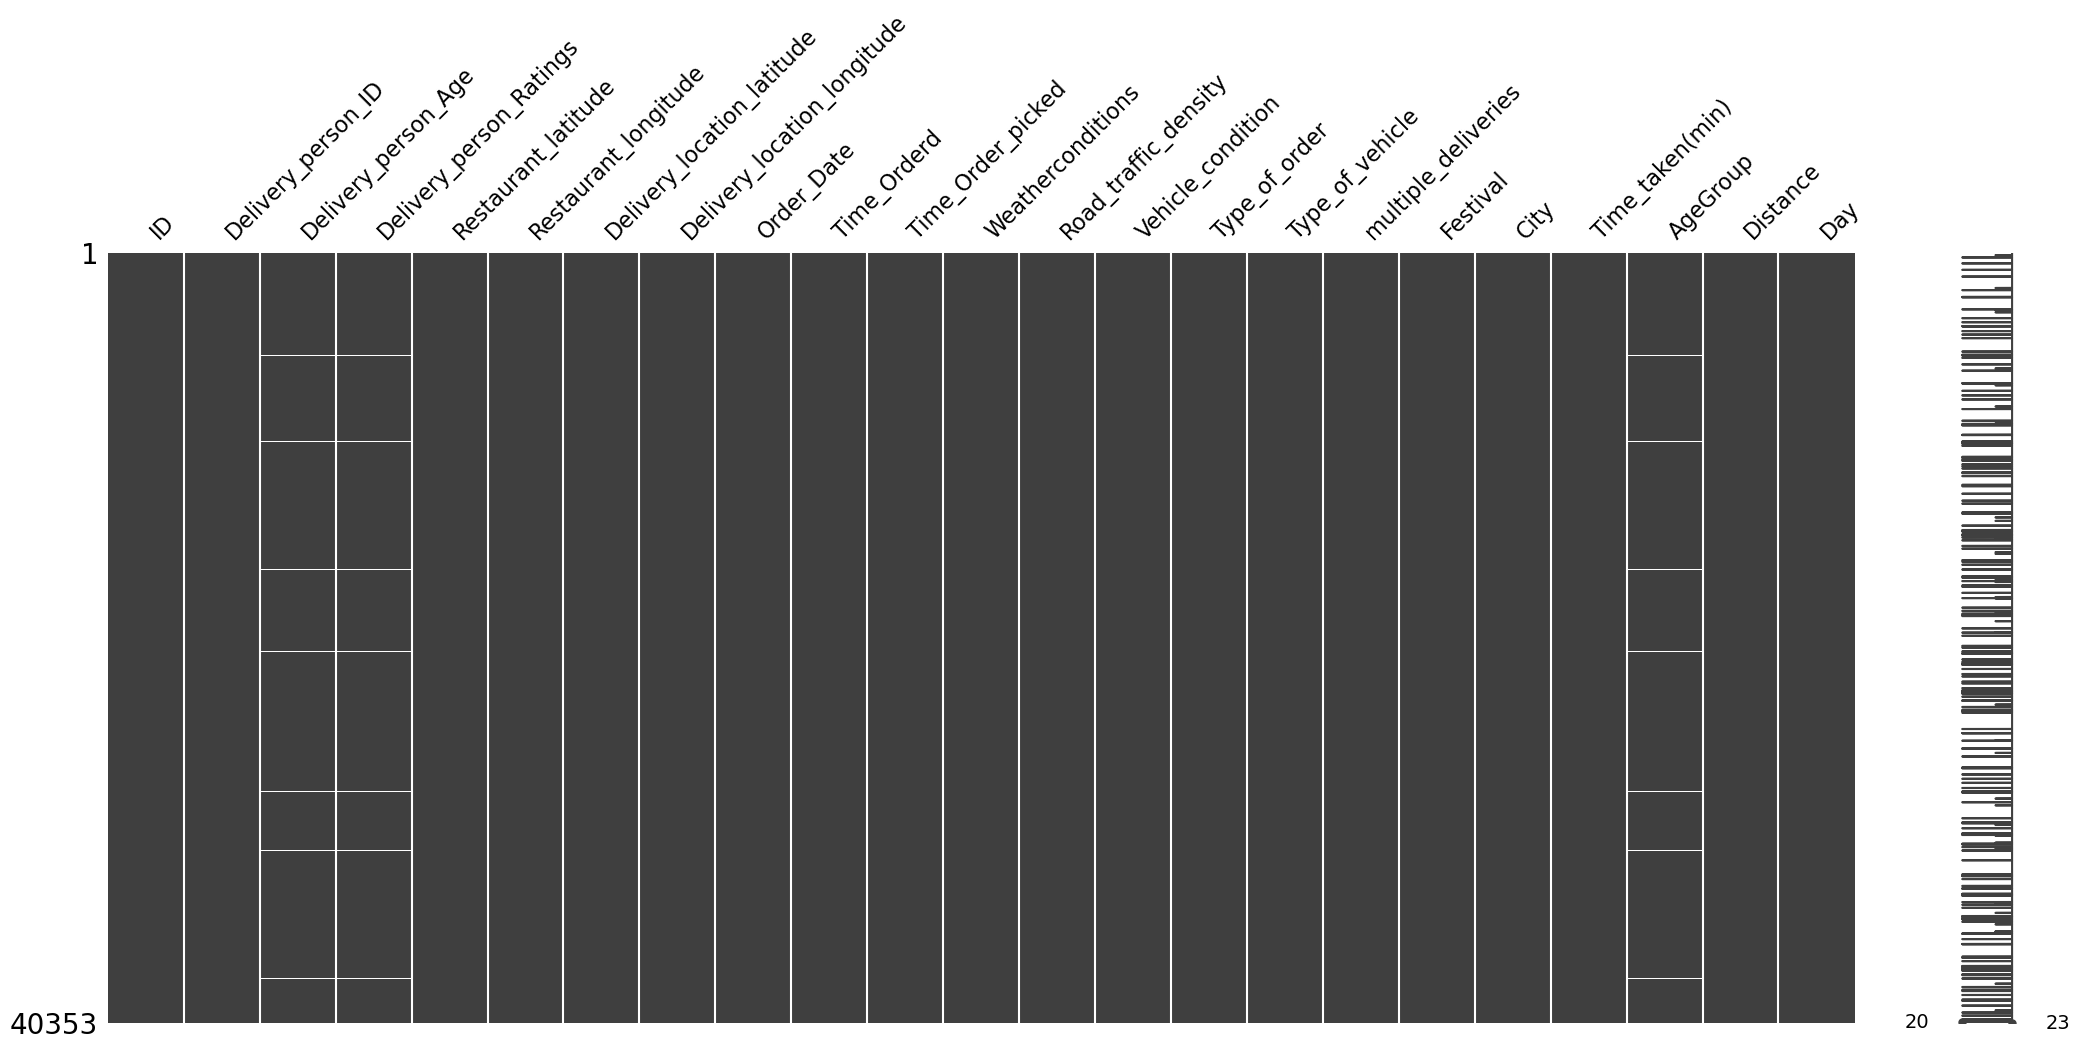

In [34]:
msno.matrix(data)

In [35]:
data.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            200
Delivery_person_Ratings        244
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                      0
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries              0
Festival                         0
City                             0
Time_taken(min)                  0
AgeGroup                       200
Distance                         0
Day                              0
dtype: int64

In [36]:
data['Delivery_person_Ratings'].describe()

count    40109.000000
mean         4.633987
std          0.314886
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: Delivery_person_Ratings, dtype: float64

### Impute Delivery_person_Ratings

In [37]:
data['Delivery_person_Ratings'].fillna(data['Delivery_person_Ratings'].mean(), inplace=True)

In [38]:
data.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            200
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                      0
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries              0
Festival                         0
City                             0
Time_taken(min)                  0
AgeGroup                       200
Distance                         0
Day                              0
dtype: int64

In [39]:
data['Delivery_person_Age'].describe()

count    40153.000000
mean        29.552611
std          5.760921
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: Delivery_person_Age, dtype: float64

In [40]:
data['Delivery_person_Age'].median()

30.0

In [41]:
data['Delivery_person_Age'].fillna(data['Delivery_person_Age'].median(),inplace=True)

In [42]:
data = data.drop(['ID'],axis=1)

In [45]:
data = data.drop(['Delivery_person_ID'],axis=1)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40353 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          40353 non-null  float64       
 1   Delivery_person_Ratings      40353 non-null  float64       
 2   Restaurant_latitude          40353 non-null  float64       
 3   Restaurant_longitude         40353 non-null  float64       
 4   Delivery_location_latitude   40353 non-null  float64       
 5   Delivery_location_longitude  40353 non-null  float64       
 6   Order_Date                   40353 non-null  datetime64[ns]
 7   Time_Orderd                  40353 non-null  datetime64[ns]
 8   Time_Order_picked            40353 non-null  object        
 9   Weatherconditions            40353 non-null  object        
 10  Road_traffic_density         40353 non-null  object        
 11  Vehicle_condition            40353 non-null  i

In [50]:
data = data.rename(columns={'Delivery_person_Age' : 'Age',
                            'Delivery_person_Ratings': 'Ratings',
                            'Restaurant_latitude': 'RestaurantLat',
                            'Restaurant_longitude': 'RestaurantLon',
                            'Delivery_location_latitude': 'DeliveryLocationLat',
                            'Delivery_location_longitude': 'DeliveryLocationLon',
                            'Order_Date': 'OrderDate',
                            'Time_Orderd': 'TimeOrdered',
                            'Time_Order_picked': 'TimeOrderPickedUp',
                            'Weatherconditions': 'WeatherConditions',
                            'Road_traffic_density': 'RoadTrafficDensity',
                            'Vehicle_condition': 'VechicleCondition',
                            'Type_of_order': 'TypeOfOrder',
                            'Type_of_vehicle': 'TypeOfVehicle',
                            'multiple_deliveries': 'MultipleDeliveries',
                            'Time_taken(min)': 'TimeTaken' ,
                            })

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40353 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Age                  40353 non-null  float64       
 1   Ratings              40353 non-null  float64       
 2   RestaurantLat        40353 non-null  float64       
 3   RestaurantLon        40353 non-null  float64       
 4   DeliveryLocationLat  40353 non-null  float64       
 5   DeliveryLocationLon  40353 non-null  float64       
 6   OrderDate            40353 non-null  datetime64[ns]
 7   TimeOrdered          40353 non-null  datetime64[ns]
 8   TimeOrderPickedUp    40353 non-null  object        
 9   WeatherConditions    40353 non-null  object        
 10  RoadTrafficDensity   40353 non-null  object        
 11  VechicleCondition    40353 non-null  int64         
 12  TypeOfOrder          40353 non-null  object        
 13  TypeOfVehicle        40353 non-null 

In [52]:
data.to_csv(r'train_cleaned.csv', index=False)